In [72]:
import numpy as np 
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns
import operator

In [73]:
data = pd.read_csv('/content/Iris1.csv')

In [74]:
type(data)

pandas.core.frame.DataFrame

In [75]:
# print(data.feature_names)
data.drop(('Id'), axis=1)

,SepalLengthCm,SepalWidthCm,Species
0,5.1,3.5,Iris-setosa
1,4.9,3.0,Iris-setosa
2,4.7,3.2,Iris-setosa
3,4.6,3.1,Iris-setosa
4,5.0,3.6,Iris-setosa
...,...,...,...
145,6.7,3.0,Iris-virginica
146,6.3,2.5,Iris-virginica
147,6.5,3.0,Iris-virginica
148,6.2,3.4,Iris-virginica


In [76]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

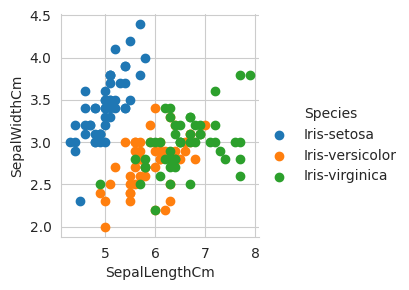

In [77]:
sns.set_style('whitegrid')
graph = sns.FacetGrid(data, hue='Species')
graph.map(plt.scatter, 'SepalLengthCm', 'SepalWidthCm').add_legend()
plt.show()

Inference from EDA (Exploratory Data Analysis):
1. While Setosa can be easily identified, Virginica and Versicolor have some overlap.
2. Length and Width are the most important features to identify various flowers.

##**NORMALIZATION OF THE DATASET**

In [78]:
#Normalization basically all the values of the different features on the same scale.

from sklearn import preprocessing

x_data = data.drop(['Species'], axis=1)
y_data = data['Species']

MinMaxScaler = preprocessing.MinMaxScaler()
x_data_minmax = MinMaxScaler.fit_transform(x_data)
df = pd.DataFrame(x_data_minmax, columns = ['SepalLengthCm', 'SepalWidthCm', 'Species'])

df.head()
print()
print(x_data)
print()
print(y_data)


      Id  SepalLengthCm  SepalWidthCm
0      1            5.1           3.5
1      2            4.9           3.0
2      3            4.7           3.2
3      4            4.6           3.1
4      5            5.0           3.6
..   ...            ...           ...
145  146            6.7           3.0
146  147            6.3           2.5
147  148            6.5           3.0
148  149            6.2           3.4
149  150            5.9           3.0

[150 rows x 3 columns]

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object


In [81]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=.2, random_state=1)
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_predict = knn.predict(x_test)
print(y_predict)

['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica']


In [82]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_predict)
print("Confusion Matrix")
print(result)
result1 = classification_report(y_test, y_predict)
print("Classification Report:")
print (result1)
result2 = accuracy_score(y_test,y_predict)
print("Accuracy:",result2)

#The confusion matrix is a matrix used to determine the performance of the classification models for a given dataset.
#The matrix itself can be easily understood.
#Since it shows the errors in the model performance in the form of a matrix, hence also called error matrix.

Confusion Matrix
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Accuracy: 1.0


##**OUR IMPLEMENTATION OH K-NEAREST NEIGHBORS ALGORITHM**

In [83]:
#Creating a fucntion which calculates the distance (euclidian distance) between two data points

def euclidian_distance(dp1, dp2, no_of_columns):
  distance = 0
  for i in range(no_of_columns):
    distance += np.square(dp1[i] - dp2[i])
  return np.sqrt(distance)

#Testing the fucntion
dp1 = [1,2,4,'b']
dp2 = [3,2,3,'c']

no_of_columns=  3
test_distance=  euclidian_distance(dp1, dp2, no_of_columns)
print(test_distance)

2.23606797749979


In [84]:
nb = [[1,2,3,4],[5,6,7,8]]
nb[0][-1]

4

In [85]:
#Creatting the KNN model

def knn(training_data, test_data, k):
  distances = {}
  sort = {}
  no_of_columns = test_data.shape[1]

  #Calcualting the euclidian distance between each row of the training and test data
  for i in range(len(training_data)):
    Interim_distance = euclidian_distance(training_data.iloc[i], test_data, no_of_columns)
    distances[i] = Interim_distance[0]

#Sorting them of the basis of the distance
  sorted_distance = sorted(distances.items(), key=operator.itemgetter(1))

#Identifying and extracting the top k neighbors
  neighbor = []
  for i in range(k):
    neighbor.append(sorted_distance[i][0])

#Calculating the most frequent class in the neighbors
  class_votes = {}
  for i in range(len(neighbor)):
    #training_data is a 2-d array returning value of last column
    classified_as = training_data.iloc[neighbor[i]][-1]
    if classified_as in class_votes:
      class_votes[classified_as] += 1;
    else:
      class_votes[classified_as] = 1;
  
  sorted_votes = sorted(class_votes.items(), key=operator.itemgetter(1), reverse=True)
  return(sorted_votes[0][0], neighbor)

##**K=5 FOR KNN**

In [106]:
testing = pd.DataFrame([[6, 2.9]])
k_value = 5
#Testing below

result, nb = knn(data, testing, k_value)

In [107]:
print("Classified as: ", result)
print(nb)

Classified as:  Iris-setosa
[6, 4, 5, 3, 7]


##**K=3 FOR KNN**

In [101]:
testing = pd.DataFrame([[5.1, 3.5]])
k_value = 3
#Testing below

result, nb = knn(data, testing, k_value)

In [102]:
print("Classified as: ", result)
print(nb)

Classified as:  Iris-setosa
[4, 3, 5]


##**SKLEARN K-NEAREST NEIGHBORS ALGORITHM**

##**K=5 FOR KNN**

In [108]:
from sklearn.neighbors import KNeighborsClassifier

nbb = KNeighborsClassifier(n_neighbors=5)
nbb.fit(data.iloc[:,0:2], data['Species'])
print(nbb.predict(testing))
print(nbb.kneighbors(testing)[1][0])

['Iris-setosa']
[6 4 5 3 7]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


##**K=3 FOR KNN**

In [103]:
from sklearn.neighbors import KNeighborsClassifier

nbb = KNeighborsClassifier(n_neighbors=3)
nbb.fit(data.iloc[:,0:2], data['Species'])
print(nbb.predict(testing))
print(nbb.kneighbors(testing)[1][0])

['Iris-setosa']
[4 3 5]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
